In [2]:
import os
import sys
import csv
import numpy as np
#import myutil
from PIL import Image
import random
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import glob
from pylab import rcParams
import scipy as sp

In [ ]:
#sd>16以上の画像を元フォルダから新しいフォルダにコピー
a=pd.read_table('/home/kanayalab/Desktop/subtypeList.txt',header=None)
#ヘッダーをつける
a.columns=['file_name','Class']
#タイプリスト一覧
type_list = ['Proximal Inflammatory',
             'TRU',
             'Proximal Proliferative']
for m in type_list:
    type_name == a[a.Class==m]
    for i in type_name["file_name"]:
        x = os.path.join("/home/kanayalab/Documents/tissue_images",i,"*") #picture files pass list
        y = os.path.join("/home/kanayalab/Documents/tissue_images",i)
        files_boss = os.path.basename(os.path.dirname(y)) #pictures ID
        make_new_dir = os.path.join("/home/kanayalab/Documents/2048pix tissue all",m,files_boss) # new directory pass
        if os.path.isdir(make_new_dir) == False:
            os.makedirs(make_new_dir)           #make new directory
        else:
            pass                                #if directory exist not make directory
        file_pass =  glob.glob(x)   
        for l in file_pass:
            with Image.open(l) as img:
                sd_tmp = np.std(np.asarray(img))
                if np.asarray(img).shape !=(2048, 2048, 3):
                    continue
                if sd_tmp < 16 :
                    continue # skip (almost) blank slice
                shutil.copy(l,make_new_dir)


In [148]:
#2048pix_画像フォルダの情報をCSVに保存
file_pass = ["/home/kanayalab/Documents/2048pix tissue all/PI/*",
             "/home/kanayalab/Documents/2048pix tissue all/PP/*",
             "/home/kanayalab/Documents/2048pix tissue all/TRU/*"]
cols = ["type","ID","file_pass","Split"]
df = pd.DataFrame(index=[],columns=cols)
for i in file_pass:
    file_pass = glob.glob(i)
    file_pass.sort()
    len_d = len(file_pass)
    length = round(len(file_pass)*0.8)
    length1 = round(len(file_pass)*0.9)
    count = 0
    for m in file_pass:
        if count>=length and count<length1:
            Split = "validation"
            file_pass_x = m
            type_x = os.path.basename(os.path.dirname(m))
            ID = os.path.basename(m)
            ID_ = ID[:23]
            record = pd.Series([type_x,ID_,file_pass_x,Split],index = cols)
            df = df.append(record,ignore_index=True)
        if count<length:
            Split = "train"
            file_pass_x = m
            type_x = os.path.basename(os.path.dirname(m))
            ID = os.path.basename(m)
            ID_ = ID[:23]
            record = pd.Series([type_x,ID_,file_pass_x,Split],index = cols)
            df = df.append(record,ignore_index=True)
        if count>=length1:
            Split = "test"
            file_pass_x = m
            type_x = os.path.basename(os.path.dirname(m))
            ID = os.path.basename(m)
            ID_ = ID[:23]
            record = pd.Series([type_x,ID_,file_pass_x,Split],index = cols)
            df = df.append(record,ignore_index=True)
        count += 1
        if count  == len_d:
            count == 0
df.to_csv("/home/kanayalab/Documents/2048pix tissue all/data_type.csv",index=False)

In [173]:
#2048pix_の標準偏差算出　to_csv
df1 = pd.read_csv("/home/kanayalab/Documents/2048pix tissue all/data_type.csv")
len(df1)
cols = ["type","ID","file_pass","Split","high","wide","depth","sd"]
df = pd.DataFrame(index=[],columns=cols)
for i in range(len(df1)):
    file_pass = df1.loc[i]["file_pass"]
    type_ = df1.loc[i]["type"]
    Split = df1.loc[i]["Split"] 
    
    ID_ = df1.loc[i]["ID"]
    picture_pass_pre = os.path.join(file_pass,"*")
    picture_pass = glob.glob(picture_pass_pre)
    for m in picture_pass:
        with Image.open(m) as img:
            array = np.asarray(img)
            high = array.shape[0]
            wide = array.shape[1]
            depth = array.shape[2]
            sd_tmp = np.std(np.asarray(img))
            record = pd.Series([type_,ID_,m,Split,high,wide,depth,sd_tmp],index = cols)
            df = df.append(record,ignore_index=True)
df.to_csv("/home/kanayalab/Documents/2048pix tissue all/picture_type_sd.csv",index=False)            
            

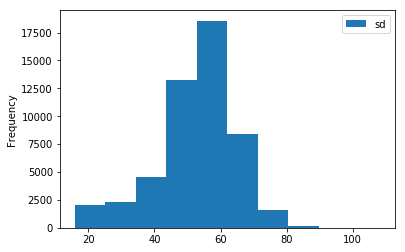

In [179]:
#標準偏差に基づいたヒストグラム
ax = df.plot(y=["sd"],kind = "hist")

6332


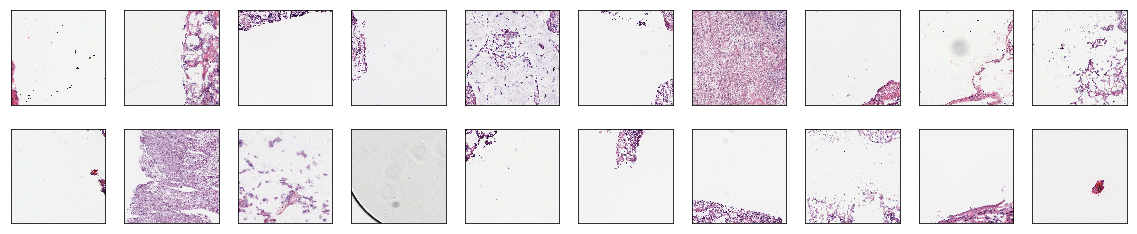

In [234]:
#標準偏差４０以下のものを除外
x = df[(df["sd"]<40)]
print(len(x))
y = x.sample(n=20)
y_1 = y["file_pass"]
n=10
plt.figure(figsize=(20,4))
i_1=0
for i in y_1:
    #オリジナル画像
    Img = np.array(Image.open(i))
    ax=plt.subplot(2,n,i_1+1)
    plt.imshow(Img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i_1+=1
    

In [2]:
#2048pixから512pixへ変換　to csv
df1 = pd.read_csv("/home/kanayalab/Documents/2048pix tissue all/picture_type_sd.csv")
len(df1)
cols = ["type","ID","file_pass","Split","high","wide","depth","sd"]
df = pd.DataFrame(index=[],columns=cols)
wide,height = 512,512
for i in range(len(df1)):
    file_pass = df1.loc[i]["file_pass"]
    type_ = df1.loc[i]["type"]
    Split = df1.loc[i]["Split"] 
    ID_ = df1.loc[i]["ID"]
    make_new_dir = os.path.join("/home/kanayalab/Documents/512pix tissue all",type_,ID_) # new directory pass
    basename = os.path.basename(file_pass)
    if os.path.isdir(make_new_dir) == False:
        os.makedirs(make_new_dir)           #make new directory
    else:
        pass                                #if directory exist not make directory
    with Image.open(file_pass) as img:
        new_path = os.path.join(make_new_dir,basename)
        img = img.resize((wide,height))
        img.save(new_path)
        array = np.asarray(img)
        high = array.shape[0]
        wide = array.shape[1]
        depth = array.shape[2]
        sd_tmp = np.std(array)
        record = pd.Series([type_,ID_,new_path,Split,high,wide,depth,sd_tmp],index = cols)
        df = df.append(record,ignore_index=True)
        
df.to_csv("/home/kanayalab/Documents/512pix tissue all/512pix_picture_type_sd.csv",index=False)       

KeyboardInterrupt: 

In [3]:
#rondom sampling from 512pix picture
Split_ = ["train","test","validation"]
df = pd.read_csv("/home/kanayalab/Documents/512pix tissue all/512pix_picture_type_sd.csv")  
x = df[(df["sd"]>40)]
def conect_csv(Split_,number):
    Type_ = ["PI","PP","TRU"]
    train_x1 = x[(x["Split"] == Split_)]
    n = 0
    number1 = round(number/3)
    for i in Type_:
        Type1 = train_x1[(train_x1["type"] == i)]
        np.random.seed(1)
        shaffle = Type1.sample(frac=1,random_state = 0)
        if n == 0:
            one_ = shaffle[1:number1+1]
        if n == 1:
            two_ = shaffle[1:number1+1]
        if n == 2:
            three_ = shaffle[1:number1+1]
        n+=1
    return pd.concat([one_,two_,three_])

In [4]:
train = conect_csv("train",1000)
val = conect_csv("validation",200)
test = conect_csv("test",200)

In [5]:
#sort sampled 512pix picture
train1 = train.sample(frac=1,random_state = 0)
test1 = test.sample(frac=1,random_state = 0)
val1 = val.sample(frac=1,random_state = 0)
train1.to_csv("/home/kanayalab/Documents/512pix tissue all/list/512pix_train_1000.csv",index=False)   
test1.to_csv("/home/kanayalab/Documents/512pix tissue all/list/512pix_test_200.csv",index=False)   
val1.to_csv("/home/kanayalab/Documents/512pix tissue all/list/512pix_val_200.csv",index=False)   

In [132]:
#croped image from resized 512pix to 128pix and make csv_file
train = pd.read_csv("/home/kanayalab/Documents/512pix tissue all/list/512pix_train_1000.csv")  
test = pd.read_csv("/home/kanayalab/Documents/512pix tissue all/list/512pix_test_200.csv")  
val = pd.read_csv("/home/kanayalab/Documents/512pix tissue all/list/512pix_val_200.csv")  

def cut_tissue_ver2(csv,Split,size,depth): #,derectory2,derectory3,
    nx=ny=size #cuted picture size
    nl=depth
    make_new_dir = os.path.join("/home/kanayalab/Documents/512pix_to_128pix",Split) # new directory pass
    if os.path.isdir(make_new_dir) == False:
        os.makedirs(make_new_dir)           #make new directory
    else:
        pass   
    cols = ["type","ID","file_pass","Split","high","wide","depth","sd"]
    df = pd.DataFrame(index=[],columns=cols)
    n=0
    for i in range(len(csv)):
        nx=ny=size #cuted picture size
        file_pass = csv.loc[i]["file_pass"]
        type_ = csv.loc[i]["type"]
        Split = csv.loc[i]["Split"] 
        ID_ = csv.loc[i]["ID"]
        #base = os.path.basename(file_pass)
        #dir1 = os.path.basename(os.path.dirname(file_pass))
        #dir2 = os.path.basename(os.path.dirname(os.path.dirname(file_pass)))
        #dir3 = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(file_pass))))
        #print(base,dir1, dir2, dir3)
        #file_pass1 = os.path.join("/mnt/Doc",dir3,dir2,dir1,base) 
        
        with Image.open(file_pass) as  img: #image open
            blunc=np.empty((10, nx, ny, nl),np.uint8) 
            sd_array = np.empty((10),np.float32)
            n = 0
            for m in range(10):
                w,h=img.size
                np.random.seed(m)
                st_pointw=np.random.choice(w-nx)
                np.random.seed(m)
                st_pointh=np.random.choice(h-ny)
                cut_img=img.crop((st_pointw,st_pointh,st_pointw+nx,st_pointh+ny))
                cut_temp1=np.asarray(cut_img)
                sd_temp1 = np.std(cut_temp1)
                if n<sd_temp1:
                    n = sd_temp1
                    img_tmp = cut_img
            img_array = np.asarray(img_tmp)
            high = img_array.shape[0]
            wide = img_array.shape[1]
            depth = img_array.shape[2]
            x  = os.path.join(make_new_dir,str(i)+str(type_)+"_"+str(ID_)+".png")
            img_tmp.save(x)
            record = pd.Series([type_,ID_,x,Split,high,wide,depth,n],index = cols)
            df = df.append(record,ignore_index=True)
        
    pass_csv = os.path.join("/home/kanayalab/Documents/512pix_to_128pix","128pix_"+Split+".csv")    
    df.to_csv(pass_csv,index=False) 

In [135]:
cut_tissue_ver2(test,"test",128,3)

In [14]:
#make np.ndarray by 128pix
import re
from enum import Enum
boss_directory = "/home/kanayalab/Documents/512pix tissue all/list"
file_list =["512pix_test_300","512pix_val_300","512pix_train_1500"]
for m in file_list:
    x = os.path.join(boss_directory,m+".csv")
    file = pd.read_csv(x)  
    nb =len(file)
    nx = ny = 512
    nl = 3
    type_name_list=["PI","PP","TRU"] #PI=0,PP=1,TRU=2
    typeNameList = {"PI":0,"PP":1,"TRU":2}
    blunc=np.empty((nb, nx, ny, nl), np.float32)  #リストの型を作成
    blunc_type=np.empty((nb),np.float32)
    ID_list=[]
    bb=0
    for i in range(len(file)):
        file_pass = file.loc[i]["file_pass"]
        type_ = file.loc[i]["type"]
        Split = file.loc[i]["Split"] 
        ID_ = file.loc[i]["ID"]
        img_ = Image.open(file_pass)
        img_temp=np.asarray(img_)
        blunc[bb,] = img_temp
        if type_ =="PI":
            blunc_type[bb,]=0
        if type_ =="PP":
            blunc_type[bb,]=1
        if type_ =="TRU":
            blunc_type[bb,]=2
        bb+=1
    path_ = os.path.dirname(boss_directory)
    pic_pass = os.path.join(path_,"npy",m+"_""picture"+".npy")
    type_pass = os.path.join(path_,"npy",m+"_"+"type"+".npy")
    
    np.save(pic_pass,blunc)
    np.save(type_pass,blunc_type)

In [11]:
boss_directory = "/home/kanayalab/Documents/512pix tissue all/list"
os.path.dirname(boss_directory)

'/home/kanayalab/Documents/512pix tissue all'

In [3]:
#make np.ndarray by 512pix
import re
from enum import Enum
train = pd.read_csv("/home/kanayalab/Documents/512pix tissue all/512pix_train.csv")  
test = pd.read_csv("/home/kanayalab/Documents/512pix tissue all/512pix_test.csv")  
val = pd.read_csv("/home/kanayalab/Documents/512pix tissue all/512pix_val.csv")  
nb = len(train)
nx = ny = 512
nl = 3
type_name_list=["PI","PP","TRU"] #PI=0,PP=1,TRU=2
typeNameList = {"PI":0,"PP":1,"TRU":2}
blunc=np.empty((nb, nx, ny, nl), np.float32)  #リストの型を作成
blunc_type=np.empty((nb),np.float32)
ID_list=[]
bb=0
for i in range(len(train)):
    file_pass = train.loc[i]["file_pass"]
    type_ = train.loc[i]["type"]
    Split = train.loc[i]["Split"] 
    ID_ = train.loc[i]["ID"]
    img_ = Image.open(file_pass)
    img_temp=np.asarray(img_src)
    blunc[bb,] = img_temp
    if type_ =="PI":
        blunc_type[bb,]=0
    if type_ =="PP":
        blunc_type[bb,]=1
    if type_ =="TRU":
        blunc_type[bb,]=2
    ID_list.append(ID)
    bb+=1
    
        
#np.save(type1+" "+"pictute"+".npy",blunc)
#np.save(type1+" "+"ID"+".npy",blunc_ID)
#np.save(type1+" "+"type"+".npy",blunc_type)

MemoryError: 

In [24]:
#TFrecord作成
import glob
import tensorflow as tf
import numpy as np
from PIL import Image
import re
train = pd.read_csv("/mnt/Doc/512pix tissue all/512pix_train.csv")  
test = pd.read_csv("/mnt/Doc/512pix tissue all/512pix_test.csv")  
val = pd.read_csv("/mnt/Doc/512pix tissue all/512pix_val.csv")  
nb = len(train)
def CreateTFR(path,out_file):
    type_name_list=["PI","PP","TRU"] #
    typeNameList = {"PI":0,"PP":1,"TRU":2}
    labels = 3
    with tf.python_io.TFRecordWriter( out_file ) as writer:
        for i in range(len(path)):
            # ファイルを開く
            file_pass = train.loc[i]["file_pass"]
            
            type_ = train.loc[i]["type"]
            Split = train.loc[i]["Split"] 
            ID_ = train.loc[i]["ID"]
            base = os.path.basename(file_pass)
            dir1 = os.path.basename(os.path.dirname(file_pass))
            dir2 = os.path.basename(os.path.dirname(os.path.dirname(file_pass)))
            dir3 = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(file_pass))))
            print(base,dir1, dir2, dir3)
            file_pass1 = os.path.join("/mnt/Doc",dir3,dir2,dir1,base)
            with Image.open(file_pass1) as image_object:  # RGB
                
                ID_2=bytes(ID_,"UTF-8")
                image = np.array(image_object)
                h,w,c =image.shape
                image_raw = image.tostring()
                if type_ == "PI":
                    label = 0
                if type_ == "PP":
                    label = 1
                if type_ == "TRU":
                    label = 2
 
                example = tf.train.Example(features=tf.train.Features(feature={
                        "height": tf.train.Feature(int64_list=tf.train.Int64List(value=[h])),
                        "width": tf.train.Feature(int64_list=tf.train.Int64List(value=[w])),
                        "channel": tf.train.Feature(int64_list=tf.train.Int64List(value=[c])),
                        "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[label])),
                        "ID" : tf.train.Feature(bytes_list=tf.train.BytesList(value=[ID_2])),
                        "image": tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_object.tobytes()]))
                        }))
 
            # レコード書込
            writer.write(example.SerializeToString())                      
#"ID": tf.train.Feature(bytes_list=tf.train.BytesList(value=[ID])),

In [25]:
CreateTFR(train,"/mnt/Doc/512pix tissue all/train.tfrecord")

5_11.jpeg TCGA-50-5931-01A-01-TS1 PP 512pix tissue all
3_5.jpeg TCGA-44-7672-11A-01-TS1 PI 512pix tissue all
8_5.jpeg TCGA-53-7813-01A-01-TS1 TRU 512pix tissue all
3_3.jpeg TCGA-78-7154-01A-01-BS1 TRU 512pix tissue all
38_11.jpeg TCGA-73-7499-01A-01-TS1 PI 512pix tissue all
16_19.jpeg TCGA-50-5932-01A-01-BS1 PP 512pix tissue all
31_10.jpeg TCGA-49-6745-11A-01-TS1 PI 512pix tissue all
4_14.jpeg TCGA-44-7671-11A-01-TS1 TRU 512pix tissue all
35_7.jpeg TCGA-73-7499-01A-01-BS1 PI 512pix tissue all
2_19.jpeg TCGA-50-5933-11A-01-TS1 PI 512pix tissue all
7_4.jpeg TCGA-67-3771-01A-01-TS1 PP 512pix tissue all
9_7.jpeg TCGA-44-6775-11A-01-TS1 PI 512pix tissue all
10_3.jpeg TCGA-67-3771-01A-01-BS1 TRU 512pix tissue all
6_6.jpeg TCGA-53-7813-01A-01-TS1 TRU 512pix tissue all
4_4.jpeg TCGA-50-5051-01A-01-BS1 PP 512pix tissue all
19_20.jpeg TCGA-50-5932-01A-01-TS1 TRU 512pix tissue all
5_20.jpeg TCGA-50-5932-01A-01-BS1 PP 512pix tissue all
25_12.jpeg TCGA-73-7499-01A-01-TS1 PI 512pix tissue all
3_3.jp

In [23]:
example =next(tf.python_io.tf_record_iterator("/mnt/Doc/512pix tissue all/train.tfrecord"))
tf.train.Example.FromString(example)

features {
  feature {
    key: "channel"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 512
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\315\273\343\317\275\343\301\262\323\253\236\272\374\360\377\355\345\364\352\345\354\364\357\363\355\351\352\352\346\345\352\346\347\370\362\366\347\335\345\377\364\376\364\350\364\335\321\337\310\275\305\327\314\324\336\324\334\337\330\337\342\335\343\334\332\337\331\330\336\342\341\347\350\347\357\364\361\374\336\330\344\277\264\304\313\276\320\260\241\266\273\251\277\273\247\300,\031\035\036\017\022\n\006\007\000\003\004\000\010\n\003\016\022\t\020\032\021\r\0345&;mSlX7R\241\177\232\305\251\302\263\240\266\277\262\306TM]{i\1770\0321\030\000\027|Yw\256\205\247\360\302\347\233m\224\242u\236\206]\205I$MR/Y;\027C\201[\212c9i\274\215\301\246v\252\177M\210\237m\250\217_\2316\nE5\016GO)bgF\177rS\214^CzH-dX@t\275\

In [313]:
len(train)

9000

In [8]:
blunc=np.empty((8000, 512, 512, 3), np.float32)  #リストの型を作成

In [16]:
file_pass = '/home/kanayalab/Documents/512pix tissue all/PP/TCGA-50-5931-01A-01-TS1/5_11.jpeg'
base = os.path.basename(file_pass)
dir1 = os.path.basename(os.path.dirname(file_pass))
dir2 = os.path.basename(os.path.dirname(os.path.dirname(file_pass)))
dir3 = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(file_pass))))
print(base,dir1, dir2, dir3)

5_11.jpeg TCGA-50-5931-01A-01-TS1 PP 512pix tissue all


In [9]:
base

'5_11.jpeg'

In [19]:
x = glob.glob("/home/kanayalab/darknet/cfg/task/datasets/training_dataset/*.png")
y = glob.glob("/home/kanayalab/darknet/cfg/task/datasets/test_dataset/full_pelvis/*.png")
z = glob.glob("/home/kanayalab/darknet/cfg/task/datasets/test_dataset/partial_pelvis/*.png")
z1 = glob.glob("/home/kanayalab/darknet/cfg/task/datasets/test_dataset/without_pelvis/*.png")

In [22]:
y1 = pd.Series(y)
z2 = pd.Series(z)
z3 = pd.Series(z1)


In [23]:
y1.sort()
z2.sort()
z3.sort()

AttributeError: 'Series' object has no attribute 'sort'

In [24]:
y1.to_csv("/home/kanayalab/test_full.csv",index=False)   
z2.to_csv("/home/kanayalab/test_partial.csv",index=False)   
z3.to_csv("/home/kanayalab/test_without.csv",index=False)   

In [13]:
#df = df.append(record,ignore_index=True)
df = pd.DataFrame(index=[])

In [15]:
s = pd.Series(x)

In [17]:
s.to_csv("/home/kanayalab/train.csv",index=False)   

In [10]:
#2048pix_画像フォルダの情報をCSVに保存
file_path = ["/mnt/Doc/2048pix_tissue_all/PI/*",
             "/mnt/Doc/2048pix_tissue_all/PP/*",
             "/mnt/Doc/2048pix_tissue_all/TRU/*"]
cols = ["type","ID","file_path","Split"]
df = pd.DataFrame(index=[],columns=cols)
for i in file_path:
    file_path = glob.glob(i)
    len_d = len(file_path)
    count = 0
    for m in file_path:
        if count <2:
            Split = "test"
            file_path_x = m
            type_x = os.path.basename(os.path.dirname(m))
            ID = os.path.basename(m)
            ID_ = ID[:23]
            record = pd.Series([type_x,ID_,file_path_x,Split],index = cols)
            df = df.append(record,ignore_index=True)
        if count >= 2:
            Split = "train"
            file_path_x = m
            type_x = os.path.basename(os.path.dirname(m))
            ID = os.path.basename(m)
            ID_ = ID[:23]
            record = pd.Series([type_x,ID_,file_path_x,Split],index = cols)
            df = df.append(record,ignore_index=True)
        count += 1
        if count  == len_d:
            count == 0
df.to_csv("/mnt/Doc/2048pix_tissue_all/data_type.csv",index=False)

In [6]:
i = "/mnt/Doc/2048pix_tissue_all/PI/*"
file_pass = glob.glob(i)

In [7]:
file_pass

['/mnt/Doc/2048pix_tissue_all/PI/TCGA-78-7145-01A-01-BS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-97-7554-01A-01-TS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-73-4658-11A-01-TS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-44-6777-01A-01-BS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-64-1679-01A-02-BS2_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-55-6981-01A-01-TS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-91-6835-01A-01-BS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-44-7662-11A-01-TS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-73-4676-11A-01-BS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-95-7039-01A-01-TS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-05-4425-01A-01-BS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-44-6145-01A-01-BS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-49-4488-11A-01-BS1_2048_files',
 '/mnt/Doc/2048pix_tissue_all/PI/TCGA-64-1679-01A-01-BS1_2048_files',
 '/mnt/Doc/2048pix_t

2019.02.15*                        Untitled3.ipynb*
2019.02.20*                        autoencodermodel1.json*
Auto encoder - classify.ipynb*     autoencodermodel_0214.json*
Autoencoder 128_128pix (1).ipynb*  autoencoderweight_0214.h5*
Preprocessing CNN.ipynb*           my data by keras autoencoder .ipynb*
Untitled.ipynb*                    reserch_code_crop.ipynb*
Untitled1.ipynb*                   sampling_0426.ipynb*
Untitled2.ipynb*                   test_featur.npy*


In [ ]:
#2048pix_の標準偏差算出　to_csv
df1 = pd.read_csv("/mnt/Doc/2048pix_tissue_all/data_type.csv")
len(df1)
cols = ["type","ID","file_path","Split","high","wide","depth","mean"]
df = pd.DataFrame(index=[],columns=cols)
for i in range(len(df1)):
    file_path = df1.loc[i]["file_path"]
    type_ = df1.loc[i]["type"]
    Split = df1.loc[i]["Split"] 
    
    ID_ = df1.loc[i]["ID"]
    picture_pass_pre = os.path.join(file_path,"*")
    picture_pass = glob.glob(picture_pass_pre)
    for m in picture_pass:
        with Image.open(m) as img:
            array = np.asarray(img)
            mean = np.mean(array)
            high = array.shape[0]
            wide = array.shape[1]
            depth = array.shape[2]
            sd_tmp = np.std(np.asarray(img))
            record = pd.Series([type_,ID_,m,Split,high,wide,depth,mean],index = cols)
            df = df.append(record,ignore_index=True)
df.to_csv("/home/kanayalab/Documents/2048pix tissue all/picture_type_sd.csv",index=False)            